<a href="https://colab.research.google.com/github/mechihallberg/2024UCALCD001/blob/main/SocialMediaConsumerBehavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [114]:
datos = pd.read_csv('datos.csv')

In [115]:
datos.head(15)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [116]:
datos.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Corroboro que la etiqueta tenga nada más 0 y 1

In [117]:
datos["Purchased"].unique()

array([0, 1])

In [118]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


Ver si hay nulos

In [119]:
datos.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Purchased', ylabel='count'>

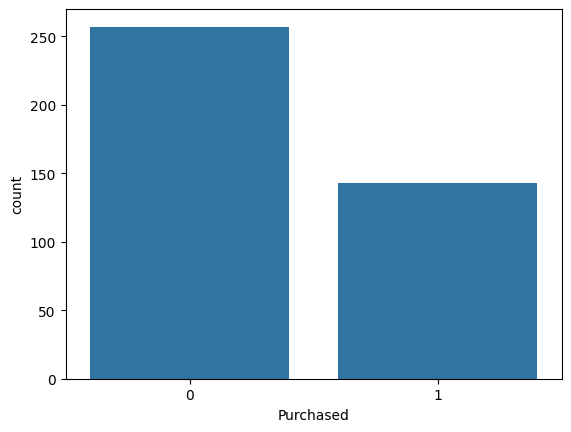

In [120]:
sb.countplot(x='Purchased', data=datos)

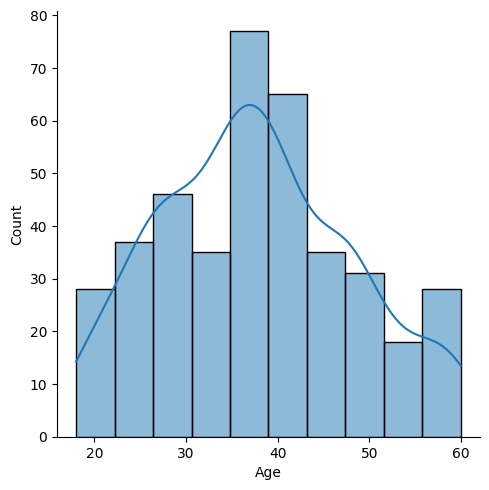

In [121]:
sb.displot(x='Age', data=datos, kde=True)

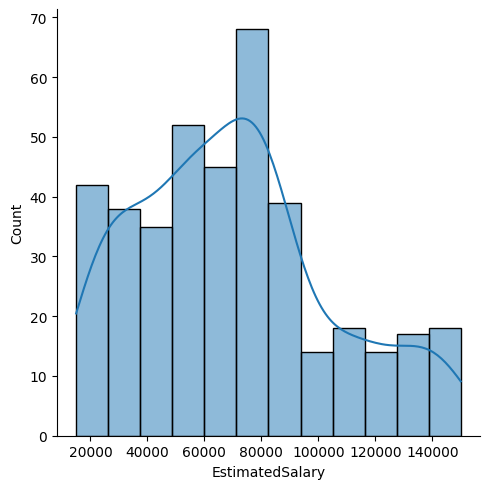

In [122]:
sb.displot(x='EstimatedSalary', data=datos, kde=True)

Matriz de correlación

<Axes: >

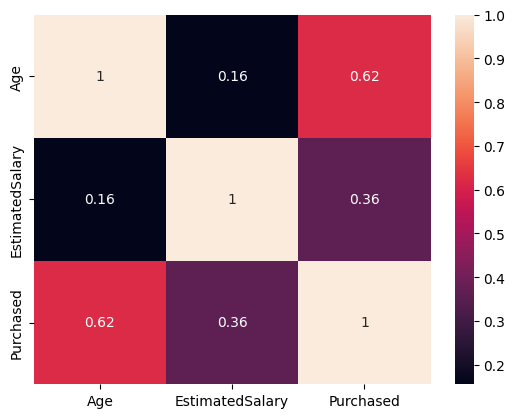

In [123]:
sb.heatmap(datos.corr(), annot=True)

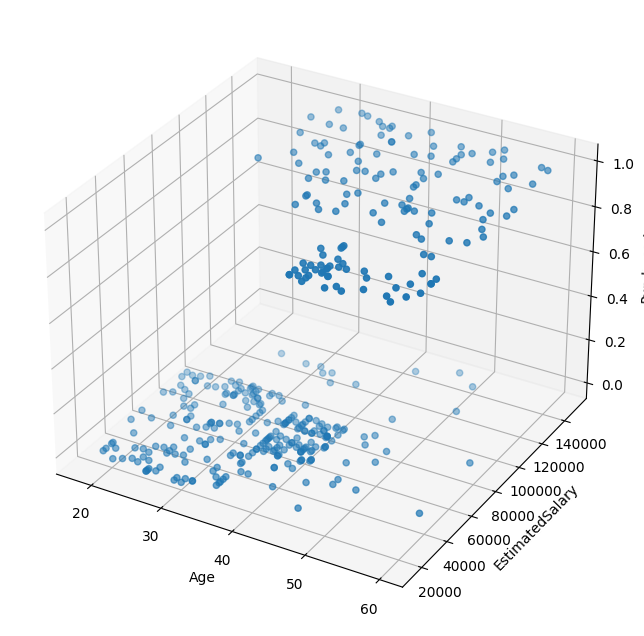

In [124]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(datos['Age'], datos['EstimatedSalary'], datos['Purchased'], marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('EstimatedSalary')
ax.set_zlabel('Purchased')
plt.show()

Entrenamiento de modelo

In [125]:
X = datos.drop('Purchased', axis=1)
Y = datos['Purchased']

In [126]:
X_ent, X_pru, Y_ent, Y_pru = train_test_split(X, Y, test_size=0.2, random_state=42)

In [127]:
num_columns = ['Age', 'EstimatedSalary']

In [128]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

sc = StandardScaler()
X_ent[num_columns] = sc.fit_transform(X_ent[num_columns])
X_pru[num_columns] = sc.transform(X_pru[num_columns])

In [129]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_ent, Y_ent)

LogisticRegression(max_iter=1000)

In [130]:
predicciones = modelo.predict(X_pru)

In [131]:
accuracy_score(Y_pru, predicciones)

0.8625

Muestro la precisión

In [132]:
from sklearn.metrics import classification_report
print(classification_report(Y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



Matriz de confusión

In [133]:
from sklearn.datasets import make_classification

Ir_clf = LogisticRegression(random_state=0)
Ir_clf.fit(X_ent, Y_ent)

#cómo importo peint_score?

print_score(Ir_clf, X_ent, Y_ent, X_pru, Y_pru, train=True)
print_score(Ir_clf, X_ent, Y_ent, X_pru, Y_pru, train=False)

NameError: name 'print_score' is not defined

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
predicciones = Ir_clf.predict(X_pru)
clf_report = pd.DataFrame(classification_report(Y_pru, predicciones, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.847458,0.904762,0.8625,0.876110,0.867514
recall,0.961538,0.678571,0.8625,0.820055,0.862500
f1-score,0.900901,0.775510,0.8625,0.838206,0.857014
support,52.000000,28.000000,0.8625,80.000000,80.000000
